In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [13]:
plt.style.use ("seaborn-poster")
%matplotlib inline

In [14]:
def diferencias_divididas (x, y):
    '''
    Función para calcular la tabla de las diferencias divididas
    Entrada: x = arreglo que contiene los coeficientes de x
             y = arreglo que contiene los valores de y para cada x
    Salida: coef = tabla de diferencias divididas
    '''
    
    n = len (y)
    coef = sp.zeros ( n )
    coef [:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef [i,j] = (coef [i+1,j-1] - coef [i,j-1]) / (x [i+j] - x [i] )
    
    return coef

In [15]:
def newton_poly (coef, x_data, x0):
    '''
    Evalúa el polinomio de Newton en x0
    Entrada: coef = tabla de diferencias divididas
    '''
    
    n = len (x_data) - 1
    p = coef [n]
    
    for i in range(1, n + 1):
        p = coef [n-i] + (x0 - x_data [n-i] ) * p
    
    return p

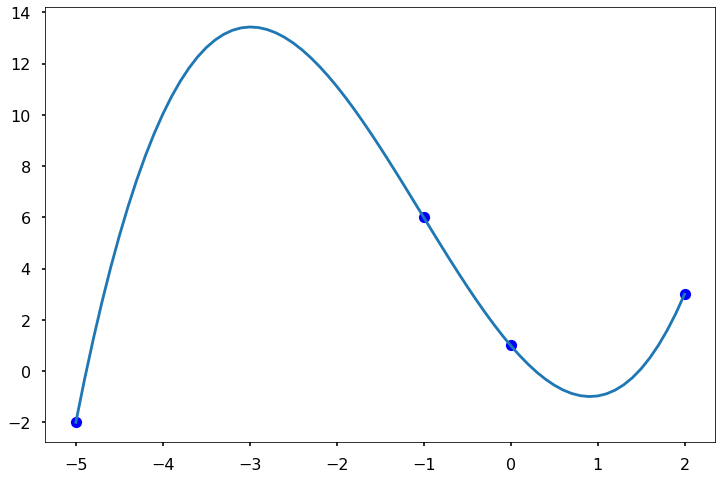

In [16]:
x = np.array ( [-5, -1, 0, 2] )
y = np.array ( [-2, 6, 1, 3] )
a_s = diferencias_divididas (x, y) [0, :]

x0 = np.arange (-5, 2.1, .1)
y0 = newton_poly (a_s, x, x0)

#print (y0)



plt.figure ( figsize = (12,8) )
plt.plot(x ,y, "bo")
plt.plot(x0,y0)

4
0
Plot object containing:
[0]: cartesian line: sqrt(x) + x**2 + cos(x) - tan(x) + 1 for x over (-10.0, 10.0)
[1]: cartesian line: x + 1 for x over (-10.0, 10.0)


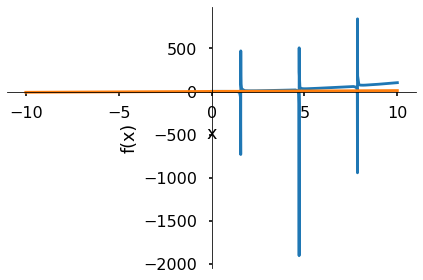

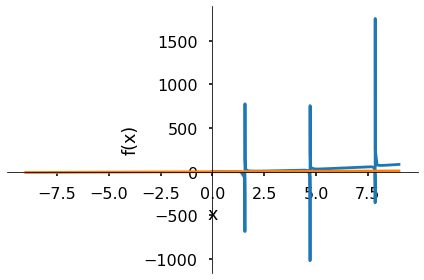

In [17]:
#test
x = sp.symbols('x')
fx1 = 
p1 = sp.plot('x^2 + 1 + cos(x) + sqrt(x) - tan(x)', 'x+1', (x,-10,10), show = False)
p2 = sp.plot('x**2 + 1 + cos(x) + sqrt(x) - tan(x)', 'x+1', (x,-9,9), show = False)
print(p1)
p1.show()
p2.show()
